In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


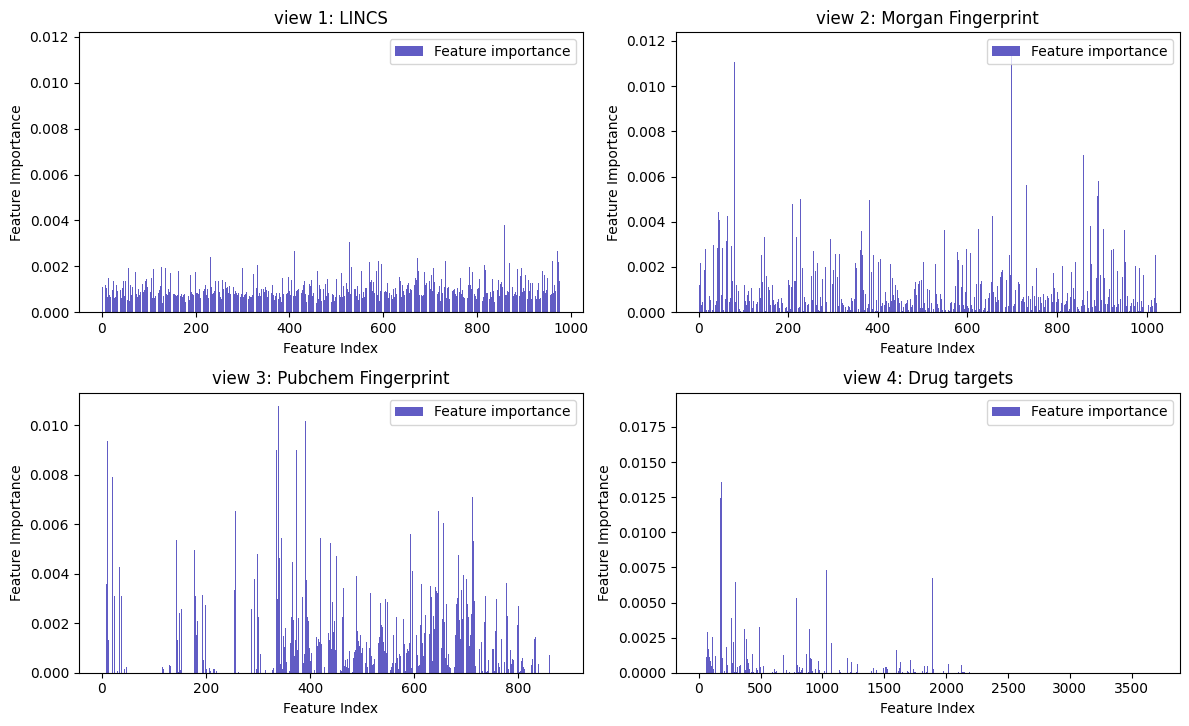

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 文件路径和标题模板
file_path = "/data/tq/RECOMB2024/result/特征重要性/view_{}.xlsx"
fi_sum_path = "/data/tq/RECOMB2024/result/特征重要性/view_{}_feature_importance_sum.csv"
subfig_title = "view {}: {}"
view_names = ['LINCS', 'Morgan Fingerprint', 'Pubchem Fingerprint', 'Drug targets']
# 创建一个包含四个子图的图形
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# fig.suptitle('Feature Importance Plots', fontsize=16)

for i, ax in enumerate(axes.ravel()):
    fi = pd.DataFrame()
    for id in range(3):
        fi_df = pd.read_excel(file_path.format(i), sheet_name=f'layer_{id}', index_col=0)
        if id == 0:
            fi['feature_importance'] = fi_df[0]
        else:
            fi["feature_importance"] += fi_df.loc[fi.index, 0]
    fi = fi / fi.sum()
    fi.to_csv(fi_sum_path.format(i, view_names[i]))

    # 绘制柱状图
    ax.bar(range(len(fi)), fi['feature_importance'], color='#615cc4', label='Feature importance')

    # 找到第20大的特征重要性值
    top_20_feature_importance = fi.sort_values(by='feature_importance', ascending=False).iloc[19]['feature_importance']

    # 添加一条水平虚线
    # ax.axhline(y=top_20_feature_importance, color='#c45c75', linestyle='--', label='Top 20 importance')
    ax.set_xlabel('Feature Index')
    ax.set_ylabel('Feature Importance')
    ax.set_title(subfig_title.format(i+1, view_names[i] ))
    ax.legend()

# 调整子图之间的间距
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 保存图形
plt.savefig('/data/tq/RECOMB2024/result/特征重要性/feature_importance_plots.png')

# # 显示图形
# plt.show()
plt.savefig("/data/tq/RECOMB2024/result/特征重要性/feature_importance.eps")

